In [73]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset, DataLoader
from matplotlib import pyplot as plt

In [28]:
# load the data
dataset = pd.DataFrame(pd.read_csv('mnist_train.csv', nrows=10000))
dataset = dataset.to_numpy()

In [59]:
# function to normalize the data
def normalize(x):
    mean = x.mean(axis=0, keepdims=True)
    std = x.std(axis=0, keepdims=True)
    index = np.where(std==0)
    std[index] = 1
    x = (x-mean)/std
    return x 

def vectorize(y):
    result = []
    for i in y:
        temp = np.zeros(10)
        temp[i] = 1
        result.append(temp)
    result = np.array(result)
    return result

In [60]:
# create numpy array
x = dataset[:,1:]
y = dataset[:,0]

x = normalize(x)
y = vectorize(y)

print(x.shape)
print(y.shape)

(10000, 784)
(10000, 10)


In [61]:
# create torch tensor
x_train_tensor = torch.from_numpy(x).float()
y_train_tensor = torch.from_numpy(y).float()

train_data = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=10, shuffle=True)

In [65]:
# neural network for digit recognition
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fct1 = nn.Linear(784, 30)
        self.fct2 = nn.Linear(30, 20)
        self.fct3 = nn.Linear(20, 10)
        
    def forward(self, x):
        x = F.relu(self.fct1(x))
        x = F.relu(self.fct2(x))
        x = self.fct3(x)
        return x
    
    def predict(self, x):
        return torch.argmax(self.forward(x))

In [68]:
# function that do a training step
def make_train_step(model, loss_fn, optimizer):
    
    def train_step(x, y):
        model.train()
        # compute the prediction 
        y_hat = model(x)
        # compute the loss function
        loss = loss_fn(y, y_hat)
        # back prop
        loss.backward()
        # optimize
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    
    return train_step

In [88]:
# training loop
lr = 1e-2
n_epochs = 30

model = net()
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

train_step = make_train_step(model, loss_fn, optimizer)

losses = []
for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        loss = train_step(x_batch, y_batch)
        losses.append(loss)
    print('epoch : '+str(epoch)+', loss : '+str(loss))
    

epoch : 0, loss : 0.07522154599428177
epoch : 1, loss : 0.05797078460454941
epoch : 2, loss : 0.0524216927587986
epoch : 3, loss : 0.05710956081748009
epoch : 4, loss : 0.024950070306658745
epoch : 5, loss : 0.017939185723662376
epoch : 6, loss : 0.02365335449576378
epoch : 7, loss : 0.043031930923461914
epoch : 8, loss : 0.026775341480970383
epoch : 9, loss : 0.008847547695040703
epoch : 10, loss : 0.02220810204744339
epoch : 11, loss : 0.01657184772193432
epoch : 12, loss : 0.029687704518437386
epoch : 13, loss : 0.025788290426135063
epoch : 14, loss : 0.016234392300248146
epoch : 15, loss : 0.02039221301674843
epoch : 16, loss : 0.029911452904343605
epoch : 17, loss : 0.02062595821917057
epoch : 18, loss : 0.025435922667384148
epoch : 19, loss : 0.017171049490571022
epoch : 20, loss : 0.011641145683825016
epoch : 21, loss : 0.0294395349919796
epoch : 22, loss : 0.006562746595591307
epoch : 23, loss : 0.019671423360705376
epoch : 24, loss : 0.02476484701037407
epoch : 25, loss : 0.00

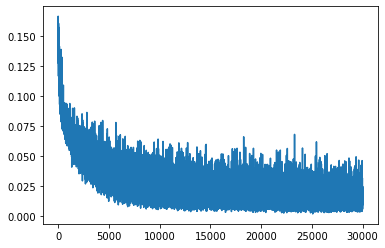

In [90]:
# plot the loss
epochs = list(range(30000))
plt.plot(epochs, losses)

In [84]:
# load the test data
dataset_test = pd.DataFrame(pd.read_csv('mnist_test.csv'))
dataset_test = dataset_test.to_numpy()

(10000, 784)
(10000,)


In [85]:
# create torch tensor
x_test = dataset_test[:,1:]
y_test = dataset_test[:,0]

print(x_test.shape)
print(y_test.shape)

x_test = normalize(x_test)

x_test_tensor = torch.from_numpy(x_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

(10000, 784)
(10000,)


In [93]:
result = 0
for i in range(len(y_test_tensor)):
    pred = model.predict(x_test_tensor[i,:])
    true_val = y_test_tensor[i]
    if pred == true_val:
        result += 1
        
accuracy = (result/len(y_test_tensor))*100
print('The accuracy of the neural network is ' + str(accuracy) +'%')

The accuracy of the neural network is 91.71000000000001%
